In [1]:
import vcs, cdms2, vcsaddons # Standard imports

In [2]:
import os # Pick up the sample data
if not os.path.exists(vcs.sample_data):
    vcs.download_sample_data_files()

In [3]:
# Load a 3hourly variable
f2 = cdms2.open(os.path.join(vcs.sample_data, "thermo.nc"))
# We need it to be one dimension (time)
t = f2("t", level=993.0, squeeze=True)
f2.close()

In [4]:
import cdtime
# Extract the time of day for each value in the time axis of t
# so we can plot the diurnal cycle
time_t = []
time_axis = t.getTime()
for time in time_axis:
    tval = cdtime.reltime(time, time_axis.units)
    time_t.append(tval.tocomponent().hour)

### Plotting data

There are seven preconfigured polar oned plots provided with VCSAddons:
  
  - `default`: Plots magnitudes against angles in radians.
  - `degrees`: Uses degrees instead of radians.
  - `diurnal`: Uses hours of the day instead of radians.
  - `diurnal_12_hour`: Uses hours of the day and AM/PM labels
  - `semidiurnal`: Clock-face plot
  - `annual_cycle`: Plots data based on month
  - `seasonal`: Same as `annual_cycle` but just shows seasons.

We're going to make a diurnal plot using the `t` variable from above.

In [5]:
# This code is just here to make the image show up. The plot should work fine on your computer.
def display(x):
    from IPython.display import Image
    x.open()
    x.png("/tmp/out.png")
    return Image(filename="/tmp/out.png")


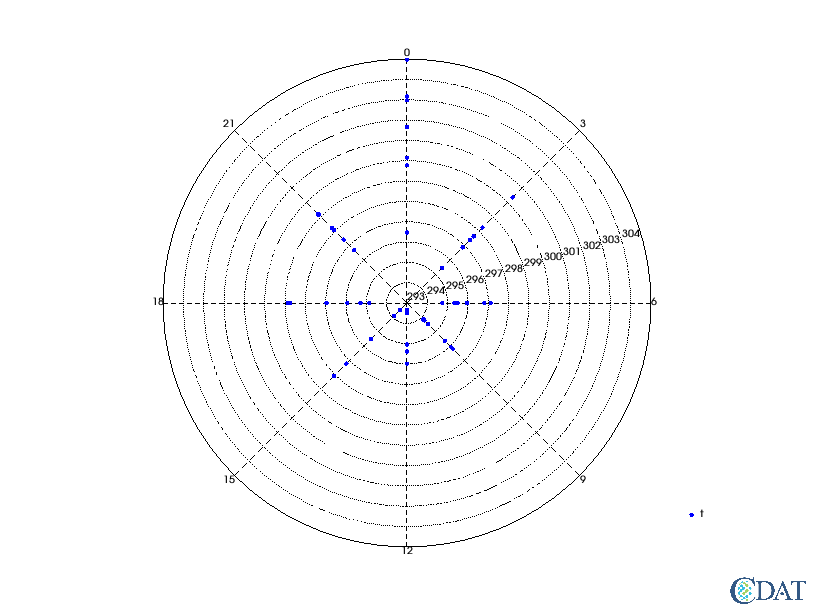

In [6]:
polar = vcsaddons.getpolar("diurnal")
display(polar.plot(t, time_t))

As you can see, that's a little tough to parse, visually. Let's dive into some of the attributes you can tweak to improve this visualization.

### `datawc_x1` and `datawc_x2`

These control the period of the circle. By default, they use radians and 2pi. The `diurnal` graphics method sets them to 0 and 24 (handles the wrap around correctly).


### `datawc_y1` and `datawc_y2`

These control the minimum and maximum magnitude of the circle, respectively. By default, it just uses the minimum and maximum values of your data. If you wanted to start at, say, 0 instead of the minimum, you would just set `polar.datawc_y1 = 0`. Here, we'll set it to 0&deg;c and set the maximum up to 320.

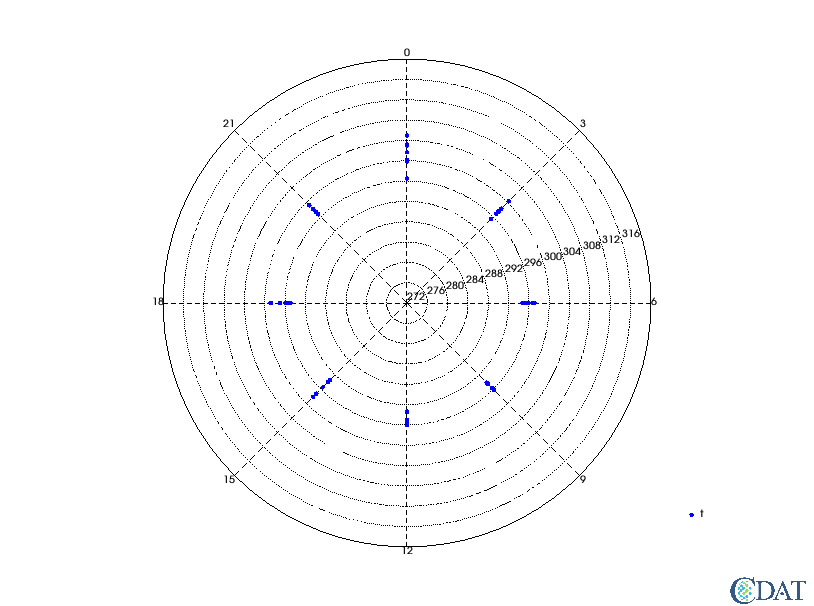

In [7]:
polar.datawc_y1 = 273
polar.datawc_y2 = 320
polar.x.clear() # Clear out the previous plot
display(polar.plot(t, time_t))

### `clockwise`

This attribute controls which direction the period increases in (clockwise or counter clockwise). Radians & degrees increase counterclockwise, but time goes clockwise, so you can handle either spin direction.

### `colormap`

This lets you set which colormap to use for the plot.

### `draw_lines`

Setting this attribute to `True` will draw a line from point to point in your plot.


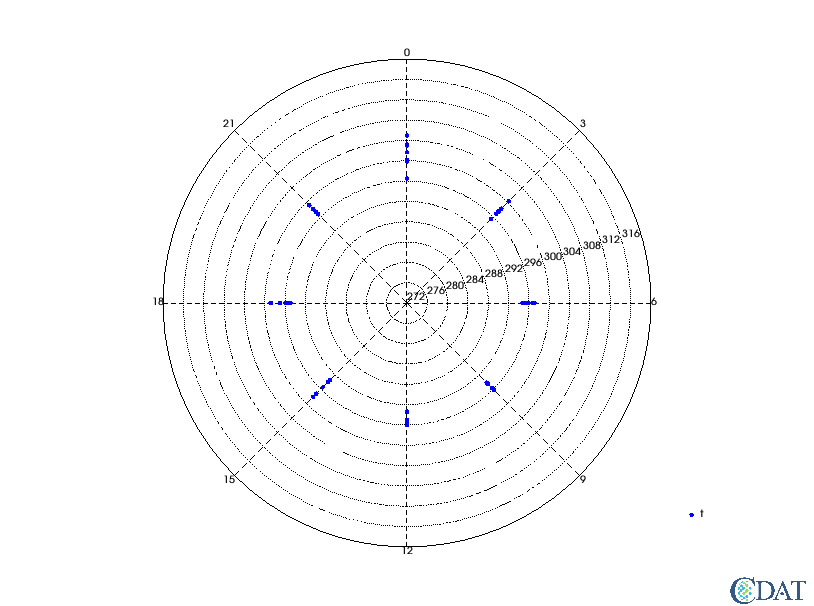

In [8]:
#polar.draw_lines = True
polar.x.clear()
display(polar.plot(t, time_t))

### `connect_groups`, `group_names`

If you want to display multiple arrays in the same plot, you can reformat your data to "group" relevant pieces. Doing so gives you access to a few more options, like drawing lines between groups or having a different marker color for each group.

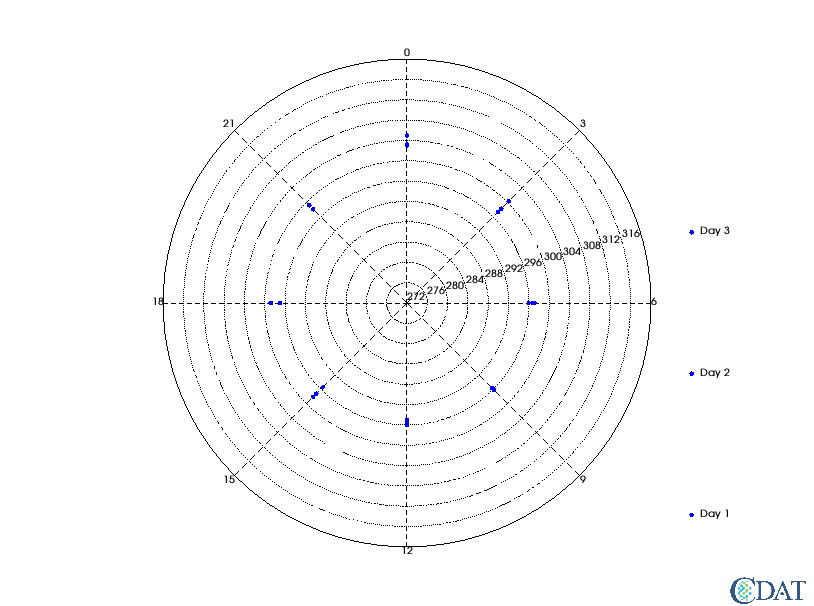

In [9]:
days = [t[i * 8:(i+1)*8] for i in range(3)] # We'll extract 3 days worth of data from t
days_time = [time_t[i*8:(i+1) * 8] for i in range(3)]
polar.group_names = ["Day 1", "Day 2", "Day 3"]
polar.x.clear()
display(polar.plot(days, days_time))

As you can see, the lines break off at the day boundary (since the data only goes up to that point for each group).

We can then use `markercolors` to set the colors for each group:

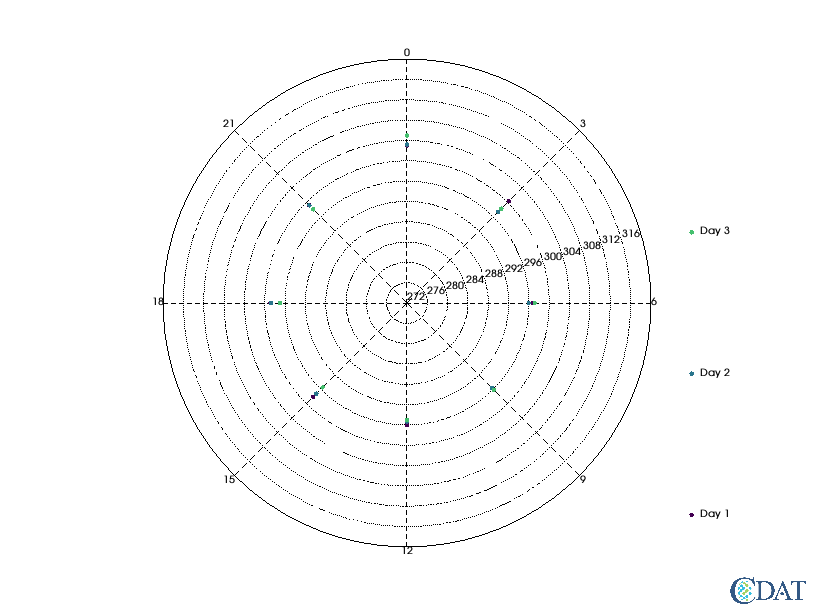

In [10]:
polar.markercolors = [0, 100, 180]
polar.x.clear()
display(polar.plot(days, days_time))

If `connect_groups` is `True`, the line will just be a single color; let's use `linecolors` to choose what color that should be.

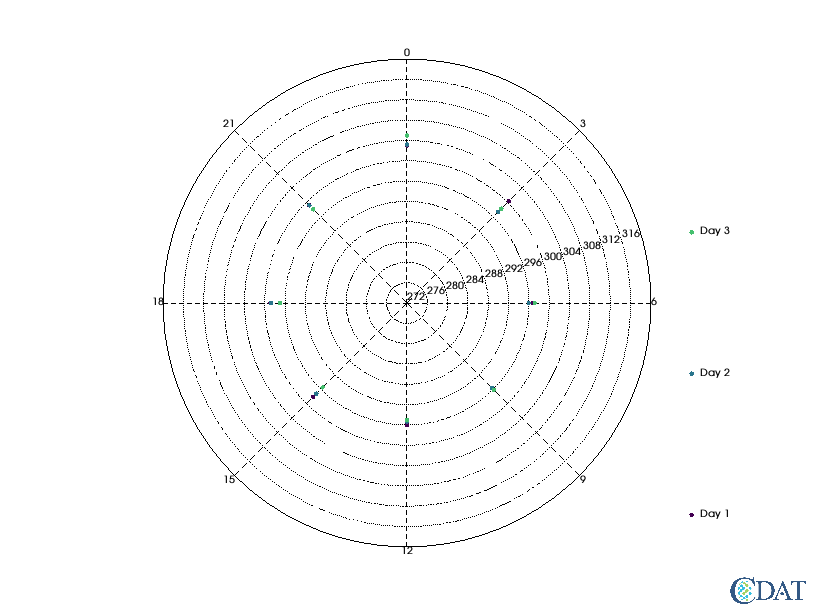

In [11]:
polar.connect_groups = True
polar.linecolors = [(50, 50, 50)]
polar.x.clear()
display(polar.plot(days, days_time))

### Other line attributes

- `line`: The type of line to use (solid, dash, dot, etc)
- `linewidths`: The width of line to use
- `linepriority`: What z-index to draw the lines at

## Magnitude attributes

### `magnitude_mintics`

These add additional layers to the plot of unlabeled tickmarks.

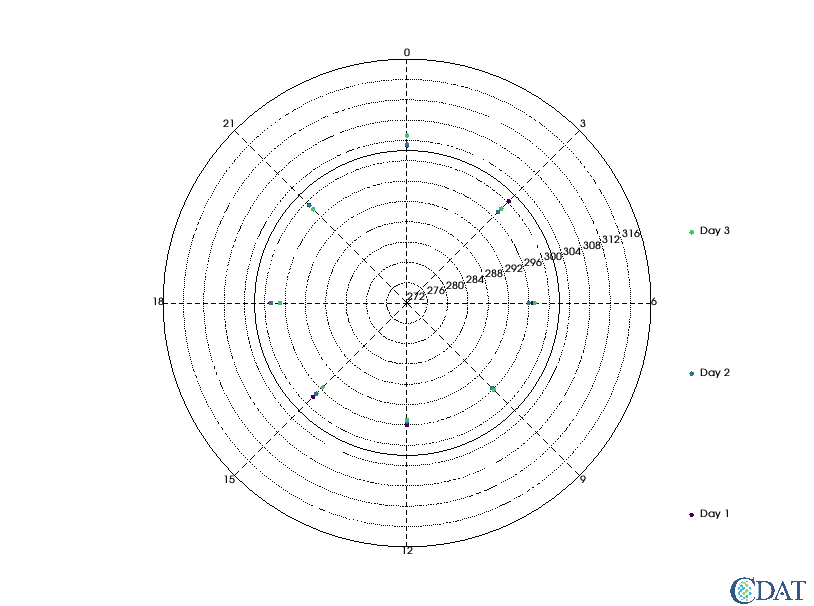

In [12]:
polar.magnitude_mintics = [302]
# You also need to enable the ymintic1 element in the template
polar.template.ymintic1.priority = 1
polar.x.clear()
display(polar.plot(days, days_time))

### `magnitude_tick_angle`

The angle at which the magnitude labels will be drawn. Provided in radians, not the units of the plot (sorry!).

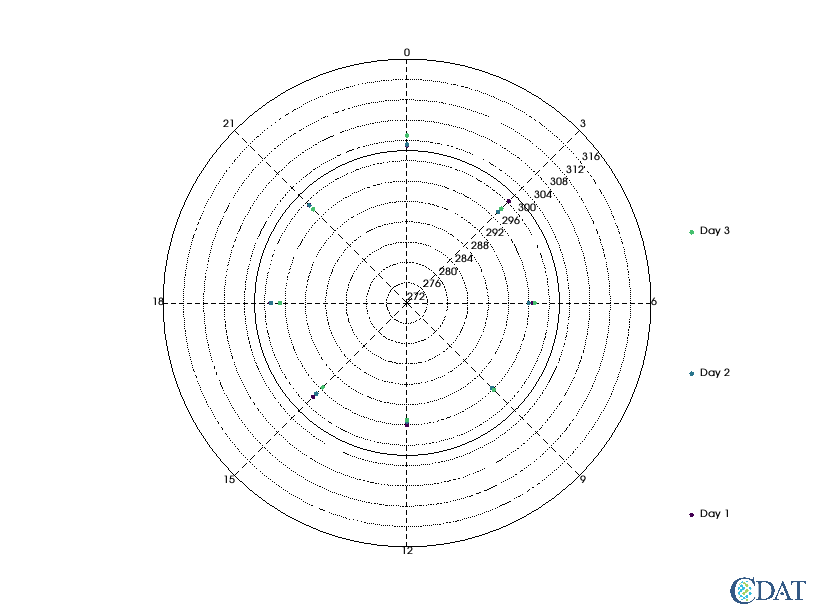

In [13]:
polar.magnitude_tick_angle = 3.1415 / 8
polar.x.clear()
display(polar.plot(days, days_time))

### `magnitude_ticks`

Where to draw the magnitude tickmarks. Only works if `datawc_y1` and `datawc_y2` are both `1e20`.

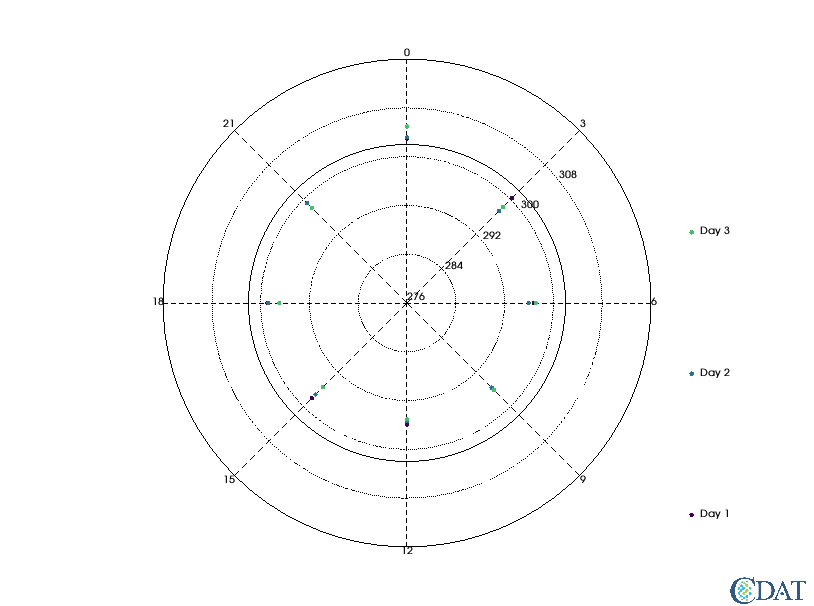

In [14]:
polar.datawc_y1 = 1e20
polar.datawc_y2 = 1e20
polar.magnitude_ticks = [276, 284, 292, 300, 308, 316]
polar.x.clear()
display(polar.plot(days, days_time))

### `markerpriority`

What z-index to draw the markers at.

### `markers`

What shape of marker to use.

### `markersizes`

What size of marker to draw.

### `theta_offset`

Controls where the minimum angle will be (given in units, so this one uses -6 (to rotate midnight 25% of the way (the top) up the circle rather than the right side of the circle)

### `theta_tick_count`

How far to space the ticks from eachother.